In [251]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread_collection
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import io

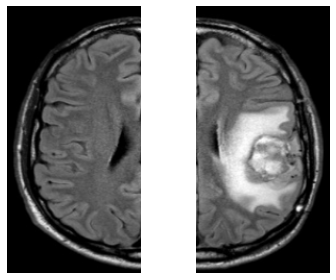

In [2]:
def splitImage(imagePath="images/fig1.jpg",blocksH=2,blocksW=2,w=256,h=256):
    im =  cv2.imread(imagePath)
    im = cv2.resize(im,(w,h))

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    M = imgheight//blocksH
    N = imgwidth//blocksW
    images=[]
    for y in range(0,imgheight,M):
        for x in range(0, imgwidth, N):
            images.append(im[y:y+M,x:x+N])

    return images

path_imgNo="C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/no/5 no.jpg"
path_imgYes="C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/yes/Y20.jpg"

blocksH=1
blocksW=2
l_images= splitImage(imagePath=path_imgYes,blocksH=blocksH,blocksW=blocksW)
fig = plt.figure()

for i in range(blocksH*blocksW):
    ax = fig.add_subplot(blocksH, blocksW, i+1);
    plt.imshow(l_images[i]);
    ax.set_axis_off();

plt.tight_layout()
plt.show()


In [3]:
def splitImage2(imagePath,blocksH=2,blocksW=2,w=256,h=256):
    im =  np.array(imagePath)
    im = cv2.resize(im,(w,h))

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    M = imgheight//blocksH
    N = imgwidth//blocksW
    images=[]
    for y in range(0,imgheight,M):
        for x in range(0, imgwidth, N):
            images.append(im[y:y+M,x:x+N])

    return images

In [280]:
#####################################################################
def SURF(img):
    surf = cv2.xfeatures2d.SURF_create()
    keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    #keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    print("Features : ",len(keypoints_surf))
    imgKP = cv2.drawKeypoints(img, keypoints_surf, None)
    return imgKP

#####################################################################
def SIFT(img,Filter=False):
    if Filter: img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
    sift = cv2.SIFT_create()
    keypoints_sift, descriptors = sift.detectAndCompute(img, None)
    #print("Features : ",len(keypoints_sift))
    imgKP = cv2.drawKeypoints(img, keypoints_sift, None)
    return imgKP,len(keypoints_sift)
#####################################################################
def ORB(img,Filter=False):
    if Filter : img = cv2.detailEnhance(img,  sigma_s=10, sigma_r=0.15)
    orb = cv2.ORB_create(nfeatures=1500)
    keypoints_orb, descriptors = orb.detectAndCompute(img, None)
    #print("Features : ",len(keypoints_orb))


    imgKP = cv2.drawKeypoints(img, keypoints_orb, None)
    return imgKP,len(keypoints_orb)
########################################################
def load_images_from_folder(folder,width=256, height=256):
    images = []
    names=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

        if img is not None:
            images.append(img)
            names.append(filename)
    return images,names
##########################################################""
#your path



normal_dir = "C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/no"
abnormal_dir = "C:/Users/pasus/Bureau/M2/IM/TP3_IM/brain_tumor_dataset/yes"

#normal_dir = '/home/dairi/Datasets/brain_tumor_dataset/no/'
#abnormal_dir = '/home/dairi/Datasets/brain_tumor_dataset/yes/'

#creating a collection with the available images
#col = imread_collection(normal_dir)
col_normal,files_normal = load_images_from_folder(normal_dir)
col_abnormal,files_abnormal = load_images_from_folder(abnormal_dir)
print("Normal ")
vec_Features_1=[]
vec_Features_2=[]

for img,filename in zip(col_normal,files_normal) :
    l_images= splitImage2(imagePath=img,blocksH=1,blocksW=2)
    
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)

    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    vec_Features_1.append(nbr_features)
    
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    vec_Features_2.append(nbr_features2)
    print("gauche "+filename+" , "+str(nbr_features)+"|"+"droite "+filename+" , "+str(nbr_features2))
    #98
    
moy1=np.mean(vec_Features_1)
moy2=np.mean(vec_Features_2)

std1=np.std(vec_Features_1)
std2=np.std(vec_Features_2)

print("La moyenne des featurs partie une  (Normal) : "+str(moy1))
print("STD  des featurs partie une  (Normal) : "+str(std1))

print("La moyenne des featurs partie deux (Normal) : "+str(moy2))
print("STD  des featurs partie deux (Normal) : "+str(std2))


#print("AbNormal ")
#for img in col_abnormal :
#for img, filename in vte("images/features/ABN-"+str(nbr_features)+"-"+filename,FimgF)
   # print(filename+" , "+str(nbr_features))



Normal 
gauche 1 no.jpeg , 115|droite 1 no.jpeg , 118
gauche 10 no.jpg , 199|droite 10 no.jpg , 191
gauche 11 no.jpg , 64|droite 11 no.jpg , 76
gauche 12 no.jpg , 127|droite 12 no.jpg , 137
gauche 13 no.jpg , 74|droite 13 no.jpg , 92
gauche 14 no.jpg , 192|droite 14 no.jpg , 175
gauche 15 no.jpg , 214|droite 15 no.jpg , 196
gauche 17 no.jpg , 163|droite 17 no.jpg , 151
gauche 18 no.jpg , 171|droite 18 no.jpg , 148
gauche 19 no.jpg , 150|droite 19 no.jpg , 142
gauche 2 no.jpeg , 81|droite 2 no.jpeg , 85
gauche 20 no.jpg , 190|droite 20 no.jpg , 192
gauche 21 no.jpg , 151|droite 21 no.jpg , 149
gauche 22 no.jpg , 240|droite 22 no.jpg , 284
gauche 23 no.jpg , 335|droite 23 no.jpg , 309
gauche 24 no.jpg , 225|droite 24 no.jpg , 188
gauche 25 no.jpg , 239|droite 25 no.jpg , 178
gauche 26 no.jpg , 221|droite 26 no.jpg , 248
gauche 27 no.jpg , 163|droite 27 no.jpg , 151
gauche 28 no.jpg , 162|droite 28 no.jpg , 158
gauche 29 no.jpg , 128|droite 29 no.jpg , 163
gauche 3 no.jpg , 181|droite 3 n

In [293]:
DF = {
    "NbFeaturesNormalGauche": vec_Features_1,
    "NbFeaturesNormalDroite": vec_Features_2
}

In [294]:
# convert array into dataframe
#data = pd.DataFrame(DF)
# save the dataframe as a csv file
#data.to_csv("NBFeaturesData.csv")

In [297]:
pd.read_csv("NBFeaturesData.csv")

,NbFeaturesNormalGauche,NbFeaturesNormalDroite
0,115,118
1,199,191
2,64,76
3,127,137
4,74,92
...,...,...
93,136,148
94,77,94
95,89,68
96,146,159


In [277]:
#pd.read_csv(io.StringIO(data.to_csv(index=False)))

<AxesSubplot:ylabel='Density'>

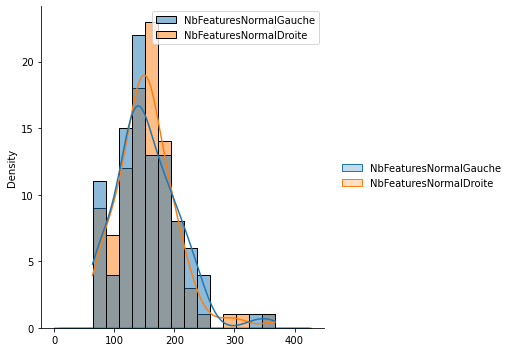

In [279]:
df= pd.read_csv("NBFeaturesData.csv");f=["NbFeaturesNormalGauche","NbFeaturesNormalDroite"]
sns.displot(df[f], kind="kde", fill=True)
sns.histplot(data=df[f], kde=True)

In [56]:
#Voici une version raccourcie du code de shasan, calculant l'intervalle de confiance à 95% de la moyenne du tableau a :
import numpy as np, scipy.stats as st

#print(st.t.interval(0.95, len(v)-1, loc=np.mean(v), scale=st.sem(v)))
st.norm.interval(0.95, loc=np.mean(v), scale=st.sem(v))

(143.44943946065877, 164.7138258454637)

In [281]:
print("Abnormal ")
vec_Features_ABN1=[]
vec_Features_ABN2=[]


for img, filename in zip(col_abnormal, files_abnormal):
    l_images= splitImage2(imagePath=img,blocksH=1,blocksW=2)
    
    FimgABN,nbr_features_ABN1 = SIFT(l_images[0],Filter=True)
    FimgABN2,nbr_features_ABN2 = SIFT(l_images[1],Filter=True)

    cv2.imwrite("images/features/NOR-"+str(nbr_features_ABN1)+"-"+filename,FimgABN)
    vec_Features_ABN1.append(nbr_features_ABN1)
    cv2.imwrite("images/features/NOR-"+str(nbr_features_ABN2)+"-"+filename,FimgABN2)
    vec_Features_ABN2.append(nbr_features_ABN2)
    print("gauche "+filename+" , "+str(nbr_features_ABN1)+" | "+"droite "+filename+" , "+str(nbr_features_ABN2))

    
moyABN=np.mean(vec_Features_ABN1)
moyABN2=np.mean(vec_Features_ABN2)

stdABN=np.std(vec_Features_ABN1)
stdABN2=np.std(vec_Features_ABN2)

print("La moyenne des featurs partie une  (Abnormal) : "+str(moyABN))
print("STD  des featurs partie une  (Abnormal) : "+str(stdABN))

print("La moyenne des featurs partie deux (Abnormal) : "+str(moyABN2))
print("STD  des featurs partie deux (Abnormal) : "+str(stdABN2))


Abnormal 
gauche Y1.jpg , 186 | droite Y1.jpg , 179
gauche Y10.jpg , 150 | droite Y10.jpg , 196
gauche Y100.JPG , 141 | droite Y100.JPG , 135
gauche Y101.jpg , 84 | droite Y101.jpg , 75
gauche Y102.jpg , 159 | droite Y102.jpg , 187
gauche Y103.jpg , 153 | droite Y103.jpg , 99
gauche Y104.jpg , 172 | droite Y104.jpg , 186
gauche Y105.jpg , 196 | droite Y105.jpg , 143
gauche Y106.jpg , 189 | droite Y106.jpg , 177
gauche Y107.jpg , 168 | droite Y107.jpg , 81
gauche Y108.jpg , 139 | droite Y108.jpg , 149
gauche Y109.JPG , 246 | droite Y109.JPG , 200
gauche Y11.jpg , 144 | droite Y11.jpg , 159
gauche Y111.JPG , 193 | droite Y111.JPG , 223
gauche Y112.JPG , 150 | droite Y112.JPG , 126
gauche Y113.JPG , 185 | droite Y113.JPG , 178
gauche Y114.JPG , 111 | droite Y114.JPG , 84
gauche Y115.JPG , 212 | droite Y115.JPG , 128
gauche Y116.JPG , 234 | droite Y116.JPG , 174
gauche Y117.JPG , 203 | droite Y117.JPG , 162
gauche Y12.jpg , 255 | droite Y12.jpg , 224
gauche Y120.JPG , 124 | droite Y120.JPG

In [311]:
158.96774193548387-47.90884077008546

111.05890116539841

In [371]:
DF_abn = {
    
    "NbFeaturesAbnormalGauche": vec_Features_ABN1,
    "NbFeaturesaAbnormalDroite": vec_Features_ABN2,
    "class" : 0
}

In [374]:
# convert array into dataframe
#data_abn = pd.DataFrame(DF_abn)
# save the dataframe as a csv file
#data_abn.to_csv("NBFeaturesAbnormalData.csv")

In [377]:
data_as_frame = pd.read_csv("NBFeaturesAbnormalData.csv")
data_as_frame

,NbFeaturesAbnormalGauche,NbFeaturesaAbnormalDroite,class
0,186,179,0
1,150,196,0
2,141,135,0
3,84,75,0
4,159,187,0
...,...,...,...
150,133,133,0
151,90,121,0
152,186,160,0
153,141,163,0


<AxesSubplot:ylabel='Density'>

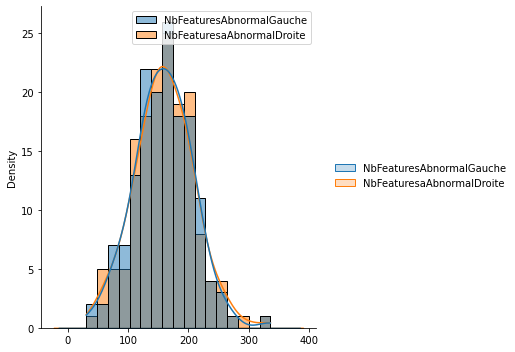

In [299]:
df_abn= pd.read_csv("NBFeaturesAbnormalData.csv");f=["NbFeaturesAbnormalGauche","NbFeaturesaAbnormalDroite"]
sns.displot(df_abn[f], kind="kde", fill=True)
sns.histplot(data=df_abn[f], kde=True)

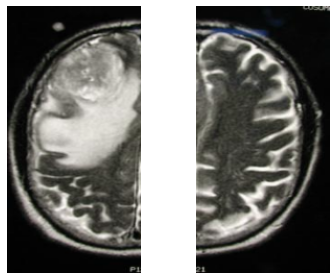

In [429]:
path_imgNo1="C:\\Users\\pasus\\Bureau\\M2\\IM\\TP3_IM\\Imagerie medical\\Brain-MRI\\Brain-MRI\\no\\5 no.jpg"
path_imgYes1 = "C:\\Users\\pasus\\Bureau\\M2\\IM\\TP3_IM\\Imagerie medical\\Brain-MRI\\Brain-MRI\\yes\\Y22.jpg"
blocksH=1
blocksW=2
l_images= splitImage(imagePath=path_imgYes1,blocksH=blocksH,blocksW=blocksW)
fig = plt.figure()

for i in range(blocksH*blocksW):
    ax = fig.add_subplot(blocksH, blocksW, i+1);
    plt.imshow(l_images[i]);
    ax.set_axis_off();

plt.tight_layout()
plt.show()

In [430]:
print("Features extraction ")
vec_F1=[]
vec_F2=[]

Fimg,nbr_f1 = SIFT(l_images[0],Filter=True)
Fimg2,nbr_f2 = SIFT(l_images[1],Filter=True)

cv2.imwrite("images/features/NOR-"+str(nbr_f1)+"-"+filename,Fimg)
vec_F1.append(nbr_f1)

cv2.imwrite("images/features/NOR-"+str(nbr_f2)+"-"+filename,Fimg2)
vec_F2.append(nbr_f2)
print("gauche "+filename+" , "+str(nbr_f1)+" | "+"droite "+filename+" , "+str(nbr_f2))

Features extraction 
gauche Y99.JPG , 116 | droite Y99.JPG , 114


In [431]:
moyG = 158.96774193548387
segmaG = 47.90884077008546

moyD = 160.04516129032257
segmaD =  49.68083188949285

sum_GAUCHE = moyG + segmaG
diff_GAUCHE = moyG - segmaG

sum_Droite = moyD + segmaD
diff_Droite =moyD - segmaD

def Classification (nbr_f1, nbr_f2) :
    
    if nbr_f1 < sum_GAUCHE and nbr_f1 > diff_GAUCHE:
        print("Abnormal Gauche")
    
    elif nbr_f2 < sum_Droite and  nbr_f2 > diff_Droite:
        print("Abnormal Droite")
    else :
        print("Normal")


In [432]:
Classification (nbr_f1, nbr_f2)

Abnormal Gauche
